In [101]:
def parallel(*args):
    result = 0
    for a in args:
        if a == 0:
            continue
        result += 1/a

    return 1/result

from math import log10, inf


# Tarea 3 Analogica
#### Amplificadores en cascada

##### a) puntos de operacion

Q1:

In [102]:
Idss = 5e-3 #A
Vp = -3 #V
Rf1 = 0.2e3 #ohm
Rf2 = 0.91e3 #ohm

from sympy import symbols, Eq, solve
Id, Vgs = symbols('Id Vgs')

eq1 = Eq(Id, Idss* (1 - Vgs/Vp)**2)
eq2 = Eq(Vgs, -Id*(Rf1+Rf2))

Vdd = 28 #V
Rd =  7.5e3 #ohm


ans =((Id, Vgs), (Id2, Vgs2)) = solve([eq1, eq2], (Id, Vgs))


Vds = Vdd - Id*(Rd + Rf1 + Rf2)
print ('Id = ', Id)
print ('Vgs = ', Vgs)
print ('Vds = ', Vds)




Id =  0.00131608813057861
Vgs =  -1.46085782494225
Vds =  16.6684811957182


Q2:

In [103]:
Vbe = .7 #V
Icq = symbols('Icq')
Re1 = 0.33e3 #ohm
Re2 = 3.3e3 #ohm
Re = Re1 + Re2

eq1 = Eq(Id*Rd, Icq*Re+Vbe)
ans  = solve(eq1, Icq)

Icq = ans[0]

hfe = 330

Ib = Icq / hfe

Rc = 5.1e3

Vce = symbols('Vce')

eq1 = Eq(-Vdd+Icq*Re+Vce+Icq*Rc, 0)

ans = solve(eq1, Vce)
Vce = ans[0]
print ('Icq = ',Icq)
print ('Ib = ', Ib)
print('Vce =', Vce)


Icq =  0.00252635288687040
Ib =  7.65561480869818e-6
Vce = 5.94493929762142


potencias disipadas

In [104]:
Pq1 = Vds*Id
Pq2 = Vce*Icq
PVdd = Vdd*(Id+Icq)

print('Pq1 = ', Pq1)
print('Pq2 = ', Pq2)
print('PVdd = ', PVdd)
print()

Pq1 =  0.0219371902564574
Pq2 =  0.0150190145568152
PVdd =  0.107588348488572



##### b) max Rd

In [105]:
#inciso b
#maximo Rd
maxRd = symbols('maxRd')

eq1 = Eq(Vgs - Vp, Vdd - Id*(maxRd + Rf1 + Rf2))

ans = solve(eq1)
maxRd = ans[0]

print('Max Rd = ', maxRd)

Max Rd =  18995.6883730946


##### c) ganancias

In [106]:
rd = 20e3 #ohm


gm = 2*Idss/abs(Vp)*(1-Vgs/Vp)
u = gm*rd

uVgs = u*Vgs

print('u = ', u)
print('gm = ', gm)
print('uVgs = ', uVgs)



Vt = 26e-3 #V
hie = hfe*Vt/Icq

print('hie = ', hie)

Ri2 = (hie+(hfe+1)*Re1)

print ('Ri2 = ', Ri2)
Rg = 1e6
Rs = 150e3

Rt1 = Rf1+rd+parallel(Rd,Ri2)


Av1 = (-u*parallel(Rd, Ri2)/Rt1)\
        *(1/(1+u*(Rf1/Rt1)))\
        *Rg/(Rg+Rs)


Rl = 15e3

Rl2 = parallel(Rc, Rl)

Av2 = (-hfe*Rl2/Ri2)
Avs = Av2*Av1
print()


print('Av1 = ', Av1)
print('Av2 = ', Av2)

u =  34.2031594457277
gm =  0.00171015797228639
uVgs =  -49.9659531140389
hie =  3396.20012888570
Ri2 =  112626.200128886

Av1 =  -6.13802908100660
Av2 =  -11.1516693967873


##### d) Ganancia total

In [107]:
print('Avs = ', Avs, '|', 20*log10(Avs), ' dB')

Ais = Avs*(Rs/Rl)
print('Ais = ', Ais)

ApdB = 10*log10(Avs*Ais)

print('ApdB = ', ApdB)


Avs =  68.4492710592514 | 36.707376550749956  dB
Ais =  684.492710592514
ApdB =  46.70737655074995


##### e) Ri' Ro1' Ro2'

In [108]:
Ri = inf

Rip = parallel(Rg,Ri)

Rop = rd+(1+u)*Rf1

Ro2 = inf

Ro2p = parallel(Ro2,Rc)
print('Ri\' = ', Rip)
print('Ro\' = ',Rop)
print('Ro2\' = ',Ro2p)

Ri' =  1000000.0
Ro' =  27040.6318891455
Ro2' =  5100.0


f) Max Vs for distortion

In [109]:
VceSat = .2 #V
dVce = Vce - VceSat

Voc = Icq*Rl

Vsmax = min(dVce, Voc)/Avs

print('Max Vs = ', Vsmax)


Max Vs =  0.0839298827981448


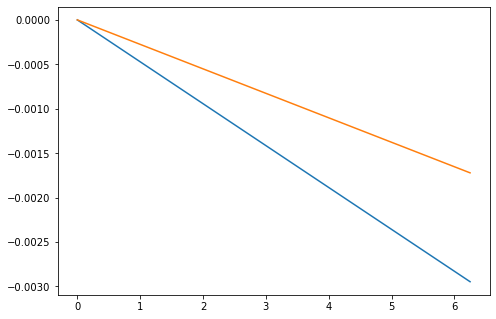

In [110]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline

m = -1/parallel(Rc, Re)
n = 0
x = np.arange(0, math.pi*2, 0.05)
l1 = m*x + n

m2 = -1/Re
l2 = m2*x +n


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, l1)
ax.plot(x, l2)
